In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
consumer_key = '##'
consumer_secret = '##'
access_key = '##'
access_secret = '##'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth)

In [3]:
# Extracting data from twitter archive
archive = pd.read_csv(r"C:\Users\pierc\Downloads\Twitter_data\twitter-archive-enhanced.csv")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Requesting image prediction data from local server
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
tweet_id = images['tweet_id']
df = []
exceptions = []
api = tweepy.API(auth,wait_on_rate_limit = True,parser=tweepy.parsers.JSONParser())

for id in tweet_id:
    try:
        page= api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        time = pd.to_datetime(page['created_at'])
        df.append({'tweet_id':int(id),
                  'favorites': int(favorites),
                  'retweets':int(retweets)})
        
        
    except Exception as e:
        exceptions.append(id)

In [7]:
df = pd.DataFrame(df,columns =['tweet_id','favorites','retweets'])
df.to_csv('tweet_json.text',encoding='utf-8')

In [8]:
df.set_index('tweet_id',inplace = True)
df

,favorites,retweets
tweet_id,,
666020888022790149,2491,491
666029285002620928,124,46
666033412701032449,120,43
666044226329800704,287,135
666049248165822465,103,41
666050758794694657,129,56
666051853826850816,1184,822
666055525042405380,422,230
666057090499244032,282,135


# Assessing Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 666020888022790149 to 892420643555336193
Data columns (total 2 columns):
favorites    2062 non-null int64
retweets     2062 non-null int64
dtypes: int64(2)
memory usage: 48.3 KB


In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive[archive['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
an             7
Buddy          7
Daisy          7
Toby           7
Koda           6
Jax            6
Jack           6
Milo           6
Bella          6
Leo            6
Rusty          6
Oscar          6
Scout          6
Stanley        6
Dave           6
Sammy          5
            ... 
Lucky          1
Chubbs         1
Dug            1
Clifford       1
Mason          1
Shnuggles      1
Meera          1
Maude          1
Trigger        1
Divine         1
Saydee         1
Combo          1
Callie         1
Pubert         1
Dotsy          1
Obi            1
Jebberson      1
Sailor         1
Iggy           1
Mabel          1
Gustav         1
Arnold         1
Karll          1
Tuco           1
Eugene         1
Maisey         1
Franq          1
Tanner        

Here are few quality issues:

QUALITY ISSUES:
 
 Timestamp should be in datetime format.
 
 Numerator ratings and denominator ratings did not have appropriate values esp ratings like 4.5 or 3.75 is not captured properly.
 
 Name of dogs are not captured properly most of the values are "a" which is not a valid Dog name.
 
 Archive Dataframe contains 2356 rows whereas images has only 2075.

 
 There are 181 retweets found in archive dataframe which should be removed
 
 There are tweets without images which should be removed
 
 Unnecessary columns should be removed
 
 Dog breeds and prediction data should be condensed
 

TIDINESS ISSUES:

 doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one    variable that identify stage of dog.

Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three    dataframes should be merged as they are part of the same observational unit.



# Cleaning Data

### Define: Merge all the Datsets

### Code:

In [15]:
df_1 = pd.merge(left=archive,right=df,how='left',left_index=False, right_index=False,on='tweet_id')
df_new = pd.merge(left =df_1 ,right =images,how='left',left_index=False, right_index=False,on='tweet_id')

In [16]:
df = df_new.copy() 

### Test:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     20

### Define : Convert timestamp to datetime object

### Code:

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Test:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites          

### Define : Exract numerator and denominator ratings¶

### Code:

In [20]:
# Extract the numerical rating from text
import re
df['new'] = df['text'].str.extract(r'(\d+\.\d+|\d+\/\d+0)',expand = True)

In [21]:
# Fetch ratings numerator and denominator
df['ratings_num'] = df['new'].str.split("/",expand=True)[0]
df['ratings_den'] = df['new'].str.split("/",expand=True)[1]

In [22]:
df['ratings_num'] = df['ratings_num'].astype(float)
df['ratings_den'] = df['ratings_num'].astype(float)

In [23]:
# Drop all the extra columns
df = df.drop(['new','rating_denominator','rating_numerator'],axis = 1)

### Test:

In [24]:
df['ratings_num'].value_counts()

12.00      557
11.00      462
10.00      462
13.00      349
9.00       155
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        17
2.00        10
1.00         8
0.00         2
420.00       2
15.00        2
9.75         2
84.00        1
50.00        1
17.00        1
13.50        1
960.00       1
143.00       1
80.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
4.30         1
92.49        1
5.70         1
121.00       1
2.40         1
8.98         1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
44.00        1
60.00        1
Name: ratings_num, dtype: int64

In [28]:
df['ratings_den'].value_counts()

12.00      557
11.00      462
10.00      462
13.00      349
9.00       155
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        17
2.00        10
1.00         8
0.00         2
420.00       2
15.00        2
9.75         2
84.00        1
50.00        1
17.00        1
13.50        1
960.00       1
143.00       1
80.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
4.30         1
92.49        1
5.70         1
121.00       1
2.40         1
8.98         1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
44.00        1
60.00        1
Name: ratings_den, dtype: int64

### Define: Extract dog names

### Code:

In [29]:
df['text_split'] = df['text'].str.split()

In [30]:
# Extract Dog names from text
names = []

def extract_names(row):
    
    # 'named Phineas'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have Phineas'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is Phineas'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to Phineas'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet Phineas'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

df['name'] = names

### Test:

In [31]:
df['name'].value_counts()

Nameless      945
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Lola            8
Winston         8
Sadie           8
Daisy           7
Jax             6
Bailey          6
Oscar           6
Bo              6
Stanley         6
Bella           6
Koda            6
Toby            6
Leo             5
Chester         5
Scout           5
Buddy           5
Milo            5
Bentley         5
Rusty           5
Louis           5
Clark           4
Phil            4
Brody           4
             ... 
Sojourner       1
Wafer           1
Zeus            1
Clarq           1
Fizz            1
Gustav          1
Iggy            1
Trigger         1
Pip             1
Finnegus        1
Rinna           1
Noah            1
Sierra          1
Octaviath.      1
Filup           1
Stu             1
Lugan           1
Pepe.           1
Maude           1
Divine          1
Saydee          1
Combo           1
Callie          1
Pubert          1
Jessiga.  

### Define: Condensing dog stages


### Code:

In [32]:
df['stage'] = df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

### Test:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     2062 non-null float64
retweets                      2062 non-null float64
jpg_url        

### Define: Remove tweets which does not have images and retweets¶

###  Code:

In [34]:
# removing the tweets without images
df = df[pd.notnull(df['jpg_url'])]

In [35]:
# removing retweets
df = df[pd.isnull(df['retweeted_status_id'])]
df.shape[0]

1994

In [36]:
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
favorites                1988 non-null float64
retweets                 1988 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2   

### Define : Condensing predictions data into one column


### Code:

In [38]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

### Test:

In [39]:
df[['breed','confidence']]

,breed,confidence
0,Unidentifiable,0.000000
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador_retriever,0.168086
4,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595
6,Appenzeller,0.341703
7,Pomeranian,0.566142
8,Irish_terrier,0.487574
9,Pembroke,0.511319


In [40]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'favorites', 'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'ratings_num', 'ratings_den', 'text_split', 'stage', 'breed',
       'confidence'],
      dtype='object')

### Define: Remove all unnecessary columns¶

### Code:

In [41]:
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','img_num', 'text_split'],axis =1,inplace =True)

In [42]:
df.drop(['doggo', 'floofer', 'pupper','puppo'],axis=1,inplace=True)

In [43]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'favorites', 'retweets',
       'jpg_url', 'ratings_num', 'ratings_den', 'stage', 'breed',
       'confidence'],
      dtype='object')

In [44]:
df.loc[df['name'] == 'Nameless'] = None
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['stage'] == 'None', 'dog_type'] = None
df.loc[df['ratings_num'] == 0.0, 'rating'] = np.nan
df.loc[df['ratings_den'] == 0.0, 'rating'] = np.nan
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan

In [45]:
# Save final clean master data as csv file
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# Analyzing Data

In [46]:
df = pd.read_csv('twitter_archive_master.csv')

In [47]:
# Correlation netween retweets, ratings_num and favorites
df[['favorites', 'retweets']].corr(method='pearson')

,favorites,retweets
favorites,1.000000,0.927205
retweets,0.927205,1.000000



With this correlation we can very well say that there is strong correlation between favorites and retweets

In [48]:
# Relation between stage and numerator ratings
df.groupby('stage')['ratings_num'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1190.0,12.170294,51.223705,2.0,10.0,11.0,12.0,1776.00
doggo,36.0,12.083333,1.480830,8.0,11.0,12.0,13.0,14.00
floofer,5.0,11.600000,1.140175,10.0,11.0,12.0,12.0,13.00
pupper,122.0,10.998033,7.630242,3.0,10.0,10.5,11.0,92.49
puppo,15.0,11.800000,1.264911,9.0,11.5,12.0,13.0,13.00


In [49]:
# Trend across introduction of  terms 
df.groupby('stage')['timestamp'].describe()

,count,unique,top,freq
stage,,,,
None,1191,1191,2016-01-20 04:13:20+00:00,1
doggo,36,36,2016-09-12 16:05:54+00:00,1
floofer,5,5,2016-01-08 03:50:03+00:00,1
pupper,122,122,2016-09-20 00:24:34+00:00,1
puppo,15,15,2016-10-16 18:11:26+00:00,1



Among all the breeds, puppers got the lowest ratings and since the minimum of floffer is 10 and upon reading timestamps data along with breeds, we realized that term floofers are consistently good rated dogs.

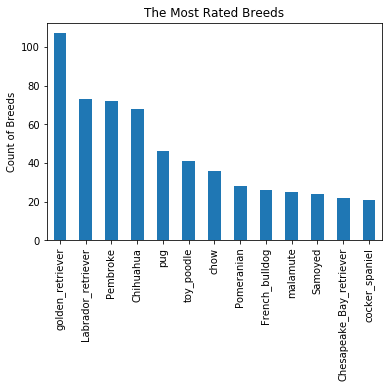

In [52]:
# Most rated breeds analysis
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');
plt.ylabel('Count of Breeds');


golden_retriever is the highest rated breed among all other breeds.

In [53]:
# Ratings trends among top 10 breeds
df_ratings = df.groupby('breed')['ratings_num'].describe().nlargest(10,'count')
df_ratings =df_ratings[['count','mean']]
df_ratings

,count,mean
breed,,
golden_retriever,106.0,11.674528
Labrador_retriever,73.0,11.219178
Pembroke,72.0,11.352778
Chihuahua,68.0,10.500000
pug,46.0,10.152174
toy_poodle,41.0,11.048780
chow,36.0,11.444444
Pomeranian,28.0,10.812500
French_bulldog,26.0,11.307692


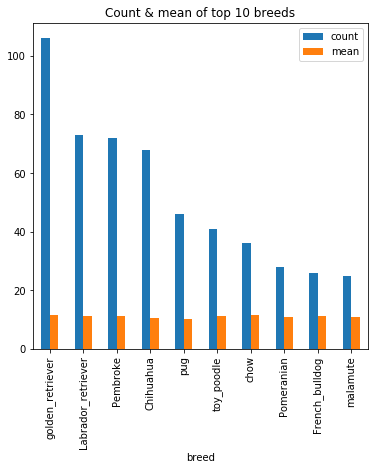

In [57]:
df_ratings.plot(kind='bar',figsize= [6,6]);
plt.title('Count & mean of top 10 breeds');

Among top 10 breeds of dogs, chow breed has the highest mean ratings whereas pug has the lowest mean ratings

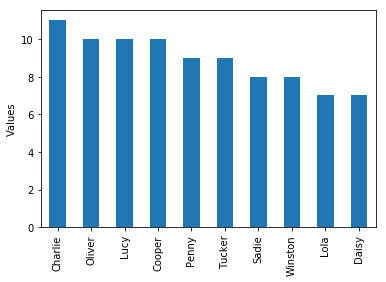

In [58]:
# popular top 10 names of Dog
top_names =df['name'].value_counts().nlargest(10)
plt.ylabel('Values')
top_names.plot(kind="bar");

In [59]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

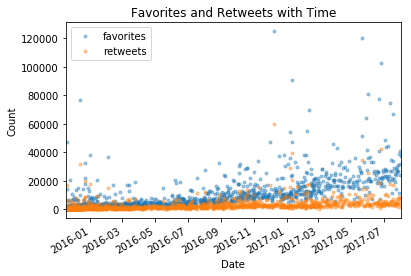

In [60]:
# Favorites and retweets trend over time
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

With this graph we can see that there is increase in favorites and retweets over time